In [3]:
from datetime import timedelta, date
import datetime
import numpy as np
import pandas as pd
import string
import re
import csv
import requests
import string

df_remotes = pd.read_csv('turnstile_location.csv', delimiter = ',', header = 0, skipinitialspace = True)

df_remotes.drop('1', axis = 1, inplace = True)

In [4]:
df_remotes.head(5)

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [5]:
df_stations = pd.read_csv('stations.csv', delimiter = ',', header = 0, skipinitialspace = True)

In [6]:
df_stations.head(5)

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575


In [63]:
df_traffic = pd.read_csv('traffic_2017.csv', delimiter = ',', header = 0, skipinitialspace = True)

In [64]:
df_traffic.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,00:00:00,REGULAR,6127245,2076158
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,04:00:00,REGULAR,6127285,2076165
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,08:00:00,REGULAR,6127304,2076196
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,12:00:00,REGULAR,6127409,2076284
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,16:00:00,REGULAR,6127654,2076350


In [65]:
df_traffic.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [66]:
df_traffic.describe()

,ENTRIES,EXITS
count,2.170121e+06,2.170121e+06
mean,3.781080e+07,3.016909e+07
std,2.032673e+08,1.820563e+08
min,0.000000e+00,0.000000e+00
25%,4.990290e+05,2.460920e+05
50%,2.636823e+06,1.486406e+06
75%,6.746402e+06,4.753406e+06
max,2.130545e+09,2.087387e+09


In [67]:
df_traffic.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [114]:
df_traffic_time = df_traffic.TIME.value_counts().sort_values(ascending = False)

print(df_traffic_time.head(50))

00:00:00    185204
04:00:00    185176
08:00:00    185070
20:00:00    185069
16:00:00    185052
12:00:00    184972
05:00:00    133307
01:00:00    133268
17:00:00    133208
09:00:00    133196
13:00:00    133158
21:00:00    133155
06:00:00      8452
18:00:00      8450
02:00:00      8441
22:00:00      8439
10:00:00      8437
14:00:00      8431
03:00:00      3015
15:00:00      3015
23:00:00      3004
11:00:00      3003
19:00:00      3001
07:00:00      2998
12:22:00      2851
00:22:00      2851
08:22:00      2848
04:22:00      2848
16:22:00      2842
20:22:00      2836
06:30:00      1501
02:30:00      1500
10:30:00      1495
18:30:00      1482
22:30:00      1480
14:30:00      1477
16:30:00       924
08:30:00       923
12:30:00       922
20:30:00       920
04:30:00       919
00:30:00       918
07:56:45        45
07:27:49        35
09:20:44        34
07:44:39        32
21:00:01        32
07:59:34        30
07:22:43        28
08:34:25        28
Name: TIME, dtype: int64


In [69]:
df_traffic_time.describe()

count     55139.000000
mean         39.357279
std        2380.645815
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      185204.000000
Name: TIME, dtype: float64

In [70]:
df_traffic["DATE_TIME"] = pd.to_datetime(df_traffic.DATE + " " + df_traffic.TIME, format="%m/%d/%Y %H:%M:%S")

In [71]:
df_traffic = df_traffic.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE_TIME'], ascending=True)

In [72]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,00:00:00,REGULAR,6127245,2076158,2017-04-08 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,04:00:00,REGULAR,6127285,2076165,2017-04-08 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,08:00:00,REGULAR,6127304,2076196,2017-04-08 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,12:00:00,REGULAR,6127409,2076284,2017-04-08 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,16:00:00,REGULAR,6127654,2076350,2017-04-08 16:00:00


In [73]:
df_traffic[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df_traffic
                                                       .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION'])['DATE_TIME', 'ENTRIES', 'EXITS']
                                                       .transform(lambda grp: grp.shift(1)))

In [74]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,00:00:00,REGULAR,6127245,2076158,2017-04-08 00:00:00,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,04:00:00,REGULAR,6127285,2076165,2017-04-08 04:00:00,2017-04-08 00:00:00,6127245.0,2076158.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,08:00:00,REGULAR,6127304,2076196,2017-04-08 08:00:00,2017-04-08 04:00:00,6127285.0,2076165.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,12:00:00,REGULAR,6127409,2076284,2017-04-08 12:00:00,2017-04-08 08:00:00,6127304.0,2076196.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,16:00:00,REGULAR,6127654,2076350,2017-04-08 16:00:00,2017-04-08 12:00:00,6127409.0,2076284.0


In [75]:
df_traffic["DIFF_ENTRIES"] = abs(df_traffic["ENTRIES"] - df_traffic["PREV_ENTRIES"])

In [76]:
df_traffic["DIFF_EXITS"] = abs(df_traffic["EXITS"] - df_traffic["PREV_EXITS"])

In [77]:
df_traffic["TOT_TRAFFIC"] = (df_traffic["DIFF_ENTRIES"] + df_traffic["DIFF_EXITS"])

In [78]:
df_traffic.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,00:00:00,REGULAR,6127245,2076158,2017-04-08 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,04:00:00,REGULAR,6127285,2076165,2017-04-08 04:00:00,2017-04-08 00:00:00,6127245.0,2076158.0,40.0,7.0,47.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,08:00:00,REGULAR,6127304,2076196,2017-04-08 08:00:00,2017-04-08 04:00:00,6127285.0,2076165.0,19.0,31.0,50.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,12:00:00,REGULAR,6127409,2076284,2017-04-08 12:00:00,2017-04-08 08:00:00,6127304.0,2076196.0,105.0,88.0,193.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/08/2017,16:00:00,REGULAR,6127654,2076350,2017-04-08 16:00:00,2017-04-08 12:00:00,6127409.0,2076284.0,245.0,66.0,311.0


In [106]:
df_traffic.sort_values(['DIFF_ENTRIES'],ascending = False).head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC
223643,C021,R212,00-00-02,59 ST,NRW,BMT,04/21/2017,08:00:00,REGULAR,2031090592,703462817,2017-04-21 08:00:00,2017-04-20 20:00:00,10518173.0,7909114.0,2.020572e+09,6.955537e+08,2.716126e+09
28163,D008,R392,00-00-02,18 AV,N,BMT,04/13/2017,09:00:00,REGULAR,1946190907,1358953142,2017-04-13 09:00:00,2017-04-13 05:00:00,7661697.0,11472850.0,1.938529e+09,1.347480e+09,3.286010e+09
108537,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,13:00:00,REGULAR,1929351363,1543550333,2017-04-12 13:00:00,2017-04-12 09:00:00,9255535.0,6083895.0,1.920096e+09,1.537466e+09,3.457562e+09
2001863,H008,R248,01-00-04,1 AV,L,BMT,06/18/2017,16:00:00,REGULAR,1627413160,167780724,2017-06-18 16:00:00,2017-06-18 12:00:00,6389847.0,674838.0,1.621023e+09,1.671059e+08,1.788129e+09
1986044,B012,R196,00-00-00,PROSPECT PARK,BQS,BMT,06/19/2017,12:00:00,REGULAR,1567690923,787607431,2017-06-19 12:00:00,2017-06-19 00:00:00,1624939.0,1668788.0,1.566066e+09,7.859386e+08,2.352005e+09


In [110]:
df_traffic[(df_traffic.LINENAME == 'F') & (df_traffic.UNIT == 'R302') & (df_traffic.SCP == '00-06-00') & (df_traffic.DATE == '04/12/2017')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC
108534,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,01:00:00,REGULAR,9255532,6083377,2017-04-12 01:00:00,2017-04-11 21:00:00,9.255304e+06,6.083323e+06,2.280000e+02,5.400000e+01,2.820000e+02
108535,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,05:00:00,REGULAR,9255535,6083396,2017-04-12 05:00:00,2017-04-12 01:00:00,9.255532e+06,6.083377e+06,3.000000e+00,1.900000e+01,2.200000e+01
108536,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,09:00:00,REGULAR,9255535,6083895,2017-04-12 09:00:00,2017-04-12 05:00:00,9.255535e+06,6.083396e+06,0.000000e+00,4.990000e+02,4.990000e+02
108537,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,13:00:00,REGULAR,1929351363,1543550333,2017-04-12 13:00:00,2017-04-12 09:00:00,9.255535e+06,6.083895e+06,1.920096e+09,1.537466e+09,3.457562e+09
108538,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,17:00:00,REGULAR,1929350839,1543550614,2017-04-12 17:00:00,2017-04-12 13:00:00,1.929351e+09,1.543550e+09,5.240000e+02,2.810000e+02,8.050000e+02
108539,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,21:00:00,REGULAR,1929349962,1543550781,2017-04-12 21:00:00,2017-04-12 17:00:00,1.929351e+09,1.543551e+09,8.770000e+02,1.670000e+02,1.044000e+03


In [79]:
df_traffic.DESC.value_counts()

REGULAR       2162308
RECOVR AUD       7813
Name: DESC, dtype: int64

In [80]:
df_traffic.DATE.describe()

count        2170121
unique            77
top       04/12/2017
freq           31452
Name: DATE, dtype: object

In [81]:
from copy import deepcopy, copy

df_traffic_nan = df_traffic.copy(deep=True)

In [82]:
df_traffic_nan.dropna(axis=0, how='any', inplace = True)

In [87]:
df_traffic_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165388 entries, 1 to 2170120
Data columns (total 18 columns):
C/A             object
UNIT            object
SCP             object
STATION         object
LINENAME        object
DIVISION        object
DATE            object
TIME            object
DESC            object
ENTRIES         int64
EXITS           int64
DATE_TIME       datetime64[ns]
PREV_DATE       datetime64[ns]
PREV_ENTRIES    float64
PREV_EXITS      float64
DIFF_ENTRIES    float64
DIFF_EXITS      float64
TOT_TRAFFIC     float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(9)
memory usage: 313.9+ MB


In [88]:
df_traffic_201705 = df_traffic_nan[(df_traffic_nan.DATE_TIME < '2017-06-01') & (df_traffic_nan.DATE_TIME >= '2017-05-01')]

In [91]:
df_traffic_201705.to_csv('traffic_201705.csv', sep = ',', index = False)

In [89]:
df_traffic_201705.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868658 entries, 596830 to 1577852
Data columns (total 18 columns):
C/A             868658 non-null object
UNIT            868658 non-null object
SCP             868658 non-null object
STATION         868658 non-null object
LINENAME        868658 non-null object
DIVISION        868658 non-null object
DATE            868658 non-null object
TIME            868658 non-null object
DESC            868658 non-null object
ENTRIES         868658 non-null int64
EXITS           868658 non-null int64
DATE_TIME       868658 non-null datetime64[ns]
PREV_DATE       868658 non-null datetime64[ns]
PREV_ENTRIES    868658 non-null float64
PREV_EXITS      868658 non-null float64
DIFF_ENTRIES    868658 non-null float64
DIFF_EXITS      868658 non-null float64
TOT_TRAFFIC     868658 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(9)
memory usage: 125.9+ MB


In [90]:
df_traffic_201705[df_traffic_201705.PREV_ENTRIES.isnull()]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DIFF_ENTRIES,DIFF_EXITS,TOT_TRAFFIC


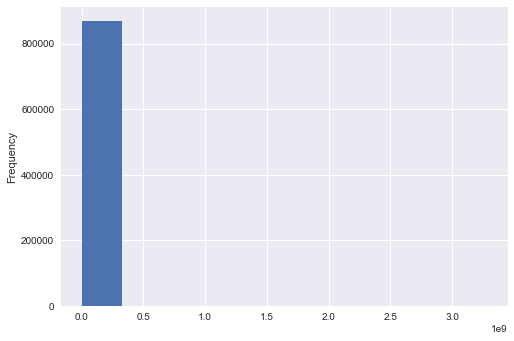

In [156]:
df_traffic_201705.TOT_TRAFFIC.plot.hist()

In [ ]:
x = df_traffic_201705.TIME.values

y = df_traffic_201705.TOT_TRAFFIC.values

#plt.scatter(x,y, s=20, marker = 'o', c='b')

In [151]:
df_active_hrs = df_traffic_201705[(df_traffic_201705.TIME <= '23:59:59') & (df_traffic_201705.TIME >= '06:30:00')]

In [139]:
df_dead = df_traffic_201705[(df_traffic_201705.TIME > '23:59:59') | (df_traffic_201705.TIME < '06:30:00')]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline

plt.style.use('seaborn')

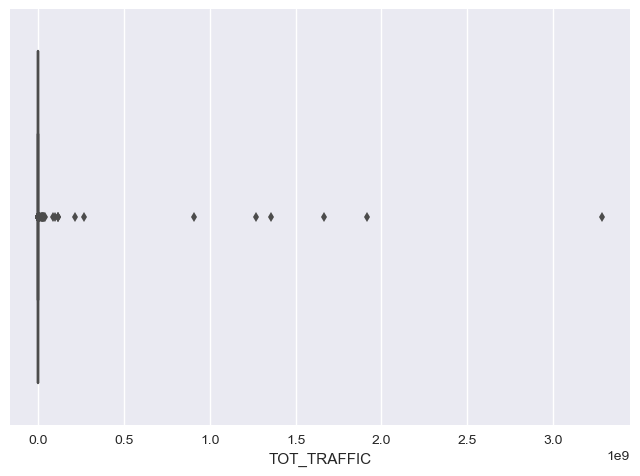

In [162]:
plt.figure(dpi=100)
sns.boxplot(df_traffic_201705.TOT_TRAFFIC)

(0, 2000)

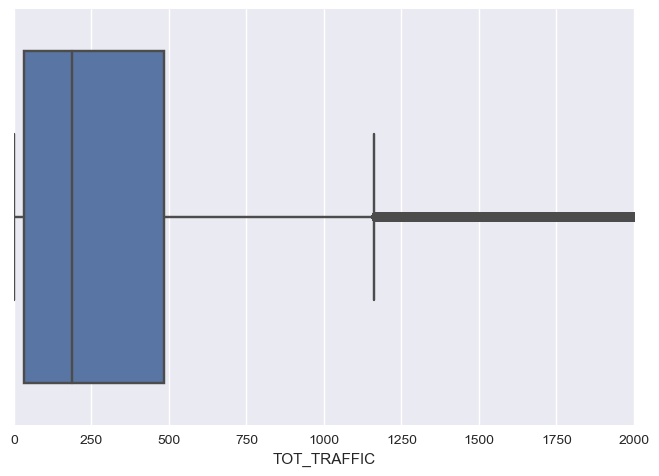

In [171]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_traffic_201705.TOT_TRAFFIC)
histplot.set_xlim(0,2000)

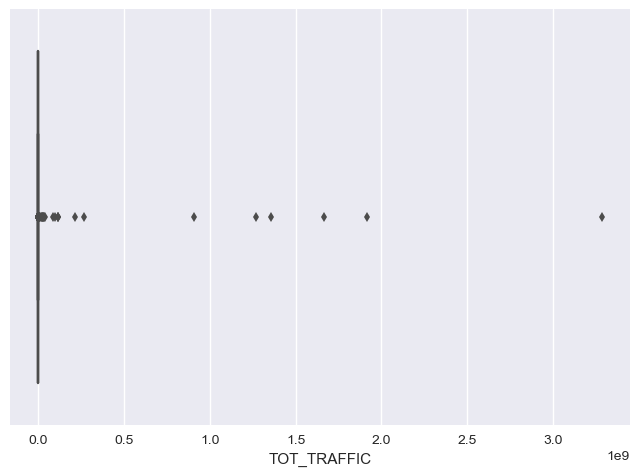

In [163]:
plt.figure(dpi=100)
sns.boxplot(df_active_hrs.TOT_TRAFFIC)

(0, 1800)

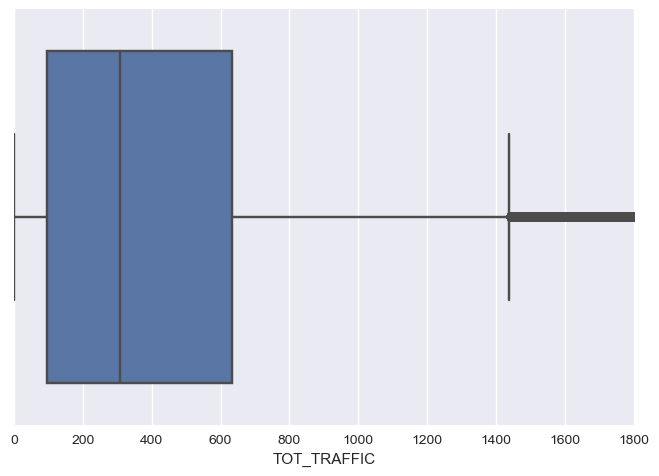

In [173]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_active_hrs.TOT_TRAFFIC)
histplot.set_xlim(0,1800)

In [178]:
outlier_limit = 1450

In [179]:
df_excl_outliers = df_active_hrs[(df_active_hrs.TOT_TRAFFIC < outlier_limit)]

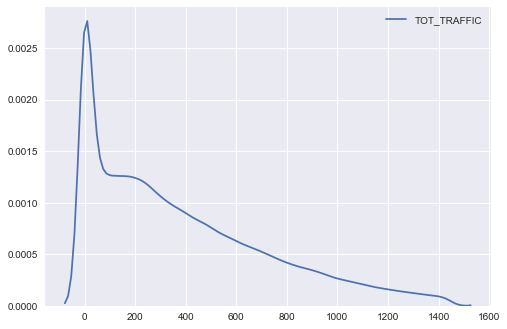

In [180]:
sns.kdeplot(df_excl_outliers.TOT_TRAFFIC)

(0, 1500)

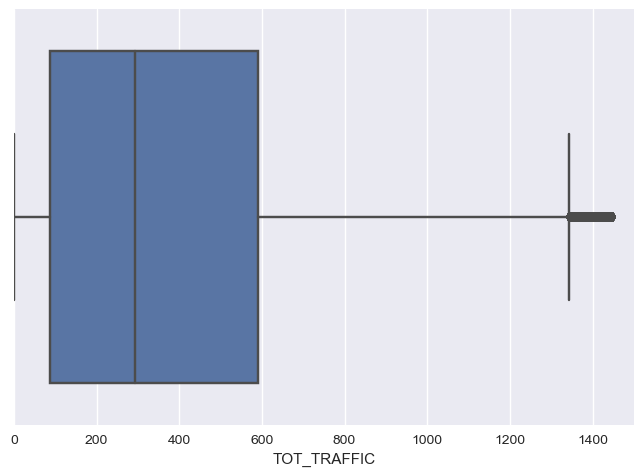

In [182]:
plt.figure(dpi=100)
histplot=sns.boxplot(df_excl_outliers.TOT_TRAFFIC)
histplot.set_xlim(0,1500)

In [146]:
1-(df_active_hrs.UNIT.count() - df_excl_outliers.UNIT.count())/df_active_hrs.UNIT.count()

0.9669442660581797

In [153]:
print(df_traffic_201705.TOT_TRAFFIC.median(),df_active_hrs.TOT_TRAFFIC.median(),df_excl_outliers.TOT_TRAFFIC.median())


186.0 309.0 293.0


In [154]:
print(df_traffic_201705.TOT_TRAFFIC.mean(),df_active_hrs.TOT_TRAFFIC.mean(),df_excl_outliers.TOT_TRAFFIC.mean())


13895.200524256958 20511.06384159755 380.3458955527059
